In [1]:
import uproot
import awkward
from uproot_methods import TLorentzVectorArray
import coffea.hist as hist
import numpy as np
import matplotlib.pyplot as plt

import boost_histogram as bh
import glob
from tqdm import tqdm

kinematics = hist.Hist(
    "Events",
    hist.Bin("e_w", "$W (GeV)$", 500, 1.0, 2.0),
    hist.Bin("e_q2", "$Q^{2} (GeV^{2})$", 500, 1.1, 2.5)
)

bh_hist = bh.Histogram(
    bh.axis.Regular(500, 1.0, 2.0),
    bh.axis.Regular(500, 1.1, 2.5),
)

def plothist2d(h):
    return plt.pcolormesh(*h.axes.edges.T, h.view().T)

In [2]:

for file_name in tqdm(glob.glob("/Users/tylern/Data/e1d/sim_test/*.root")):
    fin = uproot.open(file_name)
    tree = fin["h10"]

    BEAM_E = 4.81726
    MASS_P = 0.938

    p4_beam = TLorentzVectorArray.from_cartesian(
        np.zeros_like(tree['pxpart'].array()[:,0]),
        np.zeros_like(tree['pypart'].array()[:,0]),
        BEAM_E*np.ones_like(tree['pzpart'].array()[:,0]),
        BEAM_E*np.ones_like(tree['epart'].array()[:,0]),    
    )

    p4_target = TLorentzVectorArray.from_cartesian(
        np.zeros_like(tree['pxpart'].array()[:,0]),
        np.zeros_like(tree['pypart'].array()[:,0]),
        np.zeros_like(tree['pzpart'].array()[:,0]),
        MASS_P*np.ones_like(tree['epart'].array()[:,0]),    
    )


    p4_elec = TLorentzVectorArray.from_cartesian(
        tree['pxpart'].array()[:,0],
        tree['pypart'].array()[:,0],
        tree['pzpart'].array()[:,0],
        tree['epart'].array()[:,0],
    )

    p4_pion = TLorentzVectorArray.from_cartesian(
        tree['pxpart'].array()[:,1],
        tree['pypart'].array()[:,1],
        tree['pzpart'].array()[:,1],
        tree['epart'].array()[:,1],
    )

    kinematics.fill(
        e_w=((p4_beam-p4_elec)+p4_target).mass,
        e_q2=(-(p4_beam-p4_elec).mass2)  
    )
    
    bh_hist.fill(
        ((p4_beam-p4_elec)+p4_target).mass, (-(p4_beam-p4_elec).mass2)
    )




100%|██████████| 290/290 [01:08<00:00,  4.24it/s]


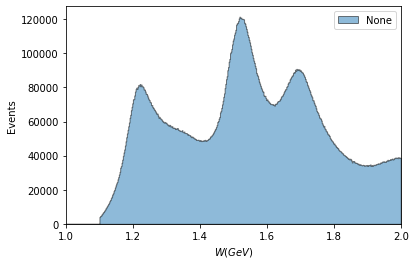

In [3]:
kin = kinematics.integrate("e_q2")
ax = hist.plot1d(
    kin,
    stack=True,
    fill_opts={'alpha': .5, 'edgecolor': (0,0,0,0.3)}
)


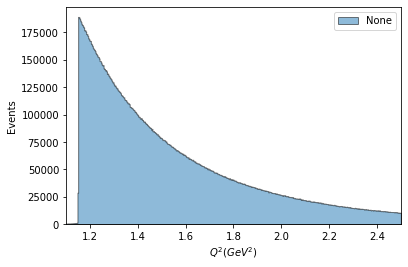

In [4]:
kin = kinematics.integrate("e_w")
ax = hist.plot1d(
    kin,
    stack=True,
    fill_opts={'alpha': .5, 'edgecolor': (0,0,0,0.3)}
)

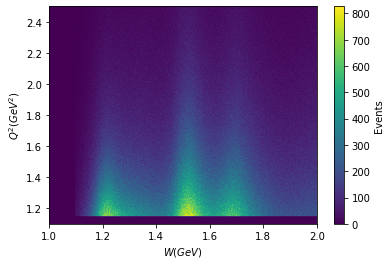

In [5]:
ax = hist.plot2d(kinematics,"e_w")

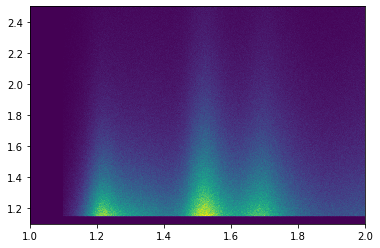

In [6]:
plothist2d(bh_hist)